pytorch加载数据主要学习了两种：只有图片的数据集和有scv保存标签的数据集
而第一种只有图片的数据集的加载又分为两种：标签在文件夹上的和标签在图片名上的

1 第一种标签在文件夹上的数据加载方法

    1.1 完整程序
    
2 第二种标签在图片名上的数据加载方法

    2.1 完整程序
    
3 将数据集分为训练集，验证集和测试集的方法

    3.1 完整程序
    
4 .csv文件存储标签的数据集的加载的方法

    4.1 完整程序
    

# 1第一种标签在文件夹上的数据加载方法

如下图所示：
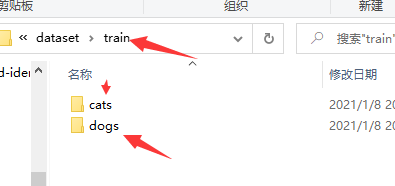

这种类型的数据集导入是很方便的可以直接调用pytorch中的ImageFolder进行载入

首先需要做的事情便是导入需要用到的库

In [14]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd

import numpy as np
import cv2
import torchvision
import matplotlib.pyplot as plt
# 过滤警告信息
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

上面的语句是由于我的python与torch版本不匹配才加的与加载数据无关

import warnings
warnings.filterwarnings("ignore")

而这两句则是为了将程序运行时的警告显示去除用的

然后添加数据增强函数transforms

In [36]:
# data_transform = transforms.Compose([
#   transforms.RandomSizedCrop(32),
#   transforms.RandomHorizontalFlip(),
#   transforms.ToTensor(),
#   transforms.Normalize(mean=[0.492, 0.461, 0.417],
#         std=[0.256, 0.248, 0.251])
#  ])
data_transform = transforms.Compose([
 transforms.Resize(224), # 缩放图片(Image)，保持长宽比不变，最短边为32像素
 transforms.CenterCrop(224), # 从图片中间切出32*32的图片
 transforms.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 transforms.Normalize(mean=[0.492, 0.461, 0.417], std=[0.256, 0.248, 0.251]) # 标准化至[-1, 1]，规定均值和标准差
])

此函数的作用是对图片进行标准化和归一化
Resize(32)缩放图片(Image)，保持长宽比不变，最短边为32像素
CenterCrop(32)从图片中间切出32*32的图片
RandomSizedCrop(32)这一句的作用是对原图进行随机大小和高宽比的裁剪，最后的尺寸为32x32

RandomHorizontalFlip()这个则是对原图像根据概率进行随机水平翻转

transforms.ToTensor()将图片转化为张量，并使图片的形式表现为通道x高x宽的形式

transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])这个则是对数据
进行正则化操作，第一个参数为均值，第二个参数为标准差。这两个值我是使用程序进行计算的。

代码如下：

In [13]:
import numpy as np
import cv2
import os
 
# img_h, img_w = 32, 32
img_h, img_w = 32, 32   #经过处理后你的图片的尺寸大小
means, stdevs = [], []
img_list = []
 
imgs_path = "F:\\jupyter\\pytorch\\data\\dogs_cats\\dataset\\train\\dogs"#数据集的路径采用绝对引用
imgs_path_list = os.listdir(imgs_path)
 
len_ = len(imgs_path_list)
i = 0
for item in imgs_path_list:
    img = cv2.imread(os.path.join(imgs_path,item))
    img = cv2.resize(img,(img_w,img_h))
    img = img[:, :, :, np.newaxis]
    img_list.append(img)
    i += 1
    # print(i,'/',len_)    
 
imgs = np.concatenate(img_list, axis=3)
imgs = imgs.astype(np.float32) / 255.
 
for i in range(3):
    pixels = imgs[:, :, i, :].ravel()  # 拉成一行
    means.append(np.mean(pixels))
    stdevs.append(np.std(pixels))
 
# BGR --> RGB ， CV读取的需要转换，PIL读取的不用转换
means.reverse()
stdevs.reverse()
 
print("normMean = {}".format(means))
print("normStd = {}".format(stdevs))

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\jupyter\\pytorch\\data\\dogs_cats\\dataset\\train\\dogs'

获取均值和标准差后，输入便可以进行正则化计算

正则化格式如下：

output[channel] = (input[channel] - mean[channel]) / std[channel]

然后调用ImageFolder进行数据集的加载

In [37]:
hymenoptera_dataset = datasets.ImageFolder(root="./Kaggle265/train",   # F:\\jupyter\\pytorch\\data\\dogs_cats\\dataset\\train",
           transform=data_transform)

第一个参数为数据集路径的参数，路径如图所示：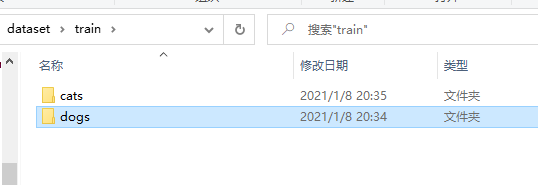

第二个参数为数据增强函数的调用，对加载的数据集进行相关数据操作

然后查看加载数据的信息与实际信息进行对比，是否有加载错误的情况,在使用此代码进行查看前数据加载中不要调用transforms，可以使用transforms=None来达到。如下图所示：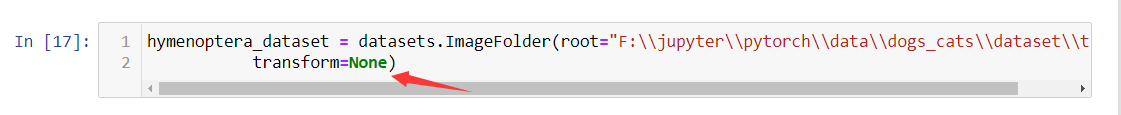

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
0
torch.Size([3, 224, 224])


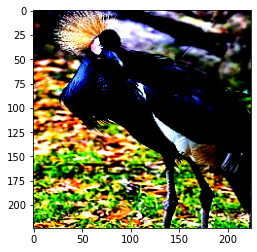

In [55]:
img, label = hymenoptera_dataset[136] #将启动魔法方法__getitem__(0)
print(label)
print(img.shape)
img = img.permute(1,2,0)
plt.imshow(img)

需要什么的0表示的是猫，1表示狗，至于为什么这样，是由于标签文件夹的顺序有关，从上到下0，1,2...
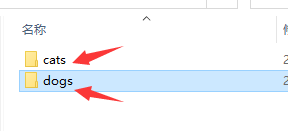

也可以进行图片尺寸和标签的查看，这个便是在进行正则化后的数据集加载查看，当把break去掉后便会显示所有图片的信息。

In [30]:
for img, label in hymenoptera_dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [31]:
dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,batch_size=4,shuffle=True) 

这样便对加载的数据进行了训练处理
batch_size=4表示加载的数据切分为4个为一组的
shuffle=True表示送人训练的的数据是打乱后送人的，而不是顺序输入

最后可以使用显示图片与对应标签的方式进行查验

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


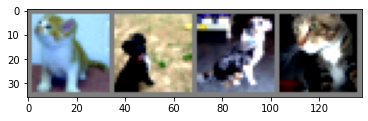

[ ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 狗 ' ,   ' 小 猫 ' ]


In [32]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(dataset_loader)#此处填写加载的数据集
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

## 1.1 完整程序

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

data_transform = transforms.Compose([
 transforms.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为32像素
 transforms.CenterCrop(32), # 从图片中间切出32*32的图片
 transforms.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 transforms.Normalize(mean=[0.492, 0.461, 0.417], std=[0.256, 0.248, 0.251]) # 标准化至[-1, 1]，规定均值和标准差
])

hymenoptera_dataset = datasets.ImageFolder(root="F:\\jupyter\\pytorch\\data\\dogs_cats\\dataset\\train",
           transform=data_transform)
dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,batch_size=4,shuffle=True) 

# 2 第二种标签在图片名上的数据加载方法

同样先导入库

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

然后通过继承Dateset类来进行数据的加载

In [34]:
class MyDataset(Dataset): #继承Dataset
    def __init__(self, path_dir, transform=None): #初始化一些属性
        self.path_dir = path_dir #文件路径
        self.transform = transform #对图形进行处理，如标准化、截取、转换等
        self.images = os.listdir(self.path_dir)#把路径下的所有文件放在一个列表中

    def __len__(self):#返回整个数据集的大小
        return len(self.images)

    def __getitem__(self,index):#根据索引index返回图像及标签
        image_index = self.images[index]#根据索引获取图像文件名称
        img_path = os.path.join(self.path_dir, image_index)#获取图像的路径或目录
        img = Image.open(img_path).convert('RGB')# 读取图像

        # 根据目录名称获取图像标签（cat或dog）
        label = img_path.split('\\')[-1].split('.')[0]
        #把字符转换为数字cat-0，dog-1
        label = 1 if 'dog' in label else 0

        if self.transform is not None:
            img = self.transform(img)
        return img,label

def __init__(self, path_dir, transform=None):主要的作用是获取数据集所在的路径的数据列表：
self.images = os.listdir(self.path_dir)
self.images这个张量中将存储path_dir路径中所有文件的名称和后缀名

具体情况见下图和下面的代码运行结果：
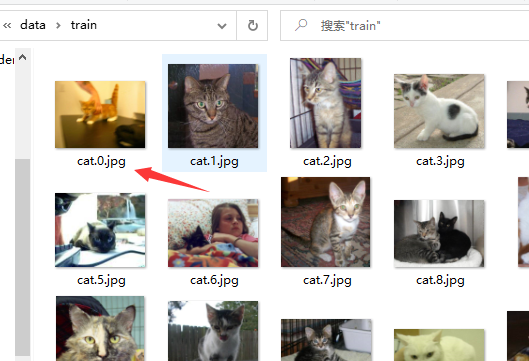

In [35]:
path_dir="F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train"
images = os.listdir(path_dir)
images

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

def __len__(self):主要作用是返回整个数据集的大小
实现方式len(self.images)

In [36]:
len(images)

25000

def __getitem__(self,index):根据索引index返回图像及标签，索引是根据文件夹内文件的顺序排列，从0开始递增

然后使用label = img_path.split('\\')[-1].split('.')[0]提取文件名中的标签

然后把对应的字符串标签转换为对应的数字label = 1 if 'dog' in label else 0

然后使用dataset进行加载

In [37]:
dataset = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",transform=None)

由于transforms设置为none所以数据没有进行处理，此时可以查看数据的尺寸标签等信息

<PIL.Image.Image image mode=RGB size=500x374 at 0x1F327B61CF8>
0


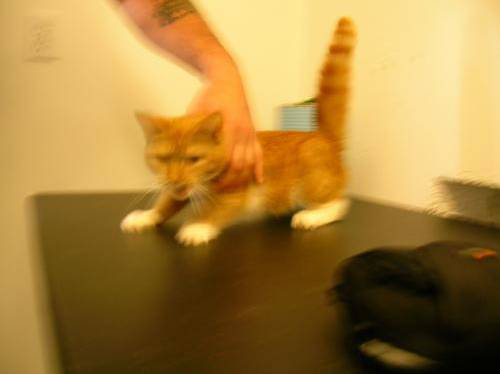

In [39]:
img, label = dataset[0] #将启动魔法方法__getitem__(0)
print(img)
print(label)
img

In [40]:
from torchvision import transforms as T
transform = T.Compose([
 T.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为224像素
 T.CenterCrop(32), # 从图片中间切出224*224的图片
 T.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 T.Normalize(mean=[0.492, 0.461, 0.417], std=[0.256, 0.248, 0.251]) # 标准化至[-1, 1]，规定均值和标准差
])

然后加入数据增强处理以后重新加载数据

In [41]:
dataset = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",transform=transform)

可以对处理后的数据进行查看

In [42]:
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [43]:
#使用DataLoader加载数据
dataloader = DataLoader(dataset,batch_size=4,shuffle=True)
for batch_datas, batch_labels in dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([4, 3, 32, 32]) torch.Size([4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


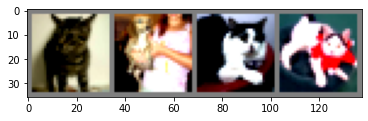

[ ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 猫 ' ,   ' 小 猫 ' ]


In [44]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(dataloader)
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

## 2.1完整程序

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils,datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

class MyDataset(Dataset): #继承Dataset
    def __init__(self, path_dir, transform=None): #初始化一些属性
        self.path_dir = path_dir #文件路径
        self.transform = transform #对图形进行处理，如标准化、截取、转换等
        self.images = os.listdir(self.path_dir)#把路径下的所有文件放在一个列表中

    def __len__(self):#返回整个数据集的大小
        return len(self.images)

    def __getitem__(self,index):#根据索引index返回图像及标签
        image_index = self.images[index]#根据索引获取图像文件名称
        img_path = os.path.join(self.path_dir, image_index)#获取图像的路径或目录
        img = Image.open(img_path).convert('RGB')# 读取图像

        # 根据目录名称获取图像标签（cat或dog）
        label = img_path.split('\\')[-1].split('.')[0]
        #把字符转换为数字cat-0，dog-1
        label = 1 if 'dog' in label else 0

        if self.transform is not None:
            img = self.transform(img)
        return img,label
    
from torchvision import transforms as T
transform = T.Compose([
 T.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为224像素
 T.CenterCrop(32), # 从图片中间切出224*224的图片
 T.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 T.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]) # 标准化至[-1, 1]，规定均值和标准差
])

dataset = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",transform=transform)
dataloader = DataLoader(dataset,batch_size=4,shuffle=True)

# 3 将数据集分为训练集，验证集和测试集的方法

大体上是以第二种方式作为加载数据的方式，然后将transforms直接内化到dataset中，并添加了数据集的划分。
本程序的讲解主要见程序注释

In [45]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torchvision import transforms as T
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils
from PIL import Image
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

In [46]:
class MyDataset(Dataset): #继承Dataset
    def __init__(self, root, transforms=None, train=True, test=False): #初始化一些属性
        self.test = test#将test变量的赋值
        imgs = [os.path.join(root, img) for img in os.listdir(root)]#数据的路径列表
        if self.test:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2].split('\\')[-1]))
            #对测试集的数据进行排序
        else:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2]))
            #对非测试集的数据进行排序
            #排序的目的是便于后续的分割
        imgs_num = len(imgs)#获取数据的长度便于切分数据集
        if self.test:
            self.imgs = imgs#将测试集的数据直接导入
        elif train:
            self.imgs = imgs[:int(0.7 * imgs_num)]#将train中数据的70%给train
        else:
            self.imgs = imgs[int(0.7 * imgs_num):]#剩下的30%做验证集
    
        if transforms is None:#对数据进行增强处理
            normalize = T.Normalize(mean=[0.488,0.455,0.417],
                                    std=[0.261,0.255,0.257])
 
            if self.test or not train:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.ToTensor(),
                    normalize
                ])
            else:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    normalize
                ])

    def __len__(self):#返回整个数据集的大小
        return len(self.imgs)

    def __getitem__(self,index):#根据索引index返回图像及标签
        img_path = self.imgs[index]
        if self.test:
            label = int(self.imgs[index].split('.')[-2].split('\\')[-1])
            #获取测试集文件名的部分作为标签
        else:
            label = 1 if 'dog' in img_path.split('\\')[-1] else 0
            #获取train中文件名中的标签并进行数字化，dog为1，cat为0
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label

In [53]:
train_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=True)
val_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=False)

训练集train_data和验证集val_data加载数据时，需要将第二个参数train设置为对应的值，便可以获取对应的数据

由于dataset中直接默认进行了transforms操作所以如果需要获取未进行数据加强操作的dataseet需要对transforms相关的操作进行注释掉即可。



In [55]:
#训练集数据
img,label=train_data[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [56]:
#验证集数据
img,label=val_data[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [57]:
#使用DataLoader加载训练集数据
train_dataloader = DataLoader(train_data,batch_size=4,shuffle=True)
for batch_datas, batch_labels in dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([4, 3, 32, 32]) torch.Size([4])


In [58]:
#使用DataLoader加载验证集数据
val_dataloader = DataLoader(val_data,batch_size=4,shuffle=True)
for batch_datas, batch_labels in dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([4, 3, 32, 32]) torch.Size([4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


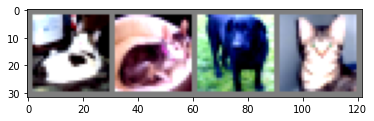

[ ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 狗 ' ,   ' 小 猫 ' ]


In [59]:
#训练集的数据
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


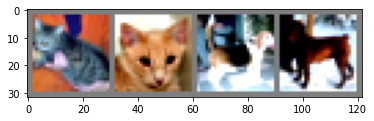

[ ' 小 猫 ' ,   ' 小 猫 ' ,   ' 小 狗 ' ,   ' 小 狗 ' ]


In [60]:
#验证集的数据
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(val_dataloader)
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%s' % ["小狗" if labels[j].item()==1 else "小猫" for j in range(4)]))

## 3.1完整的程序

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torchvision import transforms as T
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils
from PIL import Image
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

class MyDataset(Dataset): #继承Dataset
    def __init__(self, root, transforms=None, train=True, test=False): #初始化一些属性
        self.test = test
        imgs = [os.path.join(root, img) for img in os.listdir(root)]
        if self.test:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2].split('\\')[-1]))
        else:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2]))
        imgs_num = len(imgs)
        if self.test:
            self.imgs = imgs
        elif train:
            self.imgs = imgs[:int(0.7 * imgs_num)]
        else:
            self.imgs = imgs[int(0.7 * imgs_num):]
    
        if transforms is None:
            normalize = T.Normalize(mean=[0.488,0.455,0.417],
                                    std=[0.261,0.255,0.257])
 
            if self.test or not train:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.ToTensor(),
                    normalize
                ])
            else:
                self.transforms = T.Compose([
                    T.Resize(28),
                    T.CenterCrop(28),
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    normalize
                ])

    def __len__(self):#返回整个数据集的大小
        return len(self.imgs)

    def __getitem__(self,index):#根据索引index返回图像及标签
        img_path = self.imgs[index]
        if self.test:
            label = int(self.imgs[index].split('.')[-2].split('\\')[-1])
        else:
            label = 1 if 'dog' in img_path.split('\\')[-1] else 0
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label
    
train_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=True)
val_data = MyDataset("F:\\jupyter\\pytorch\\data\\dataset_kaggledogvscat\\data\\train",train=False)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=4,shuffle=True) 
val_loader = torch.utils.data.DataLoader(val_data,batch_size=4,shuffle=True) 

# 4 .csv文件存储标签的数据集的加载的方法

本数据集加载使用的数据集是给狗进行种类的识别的数据集 
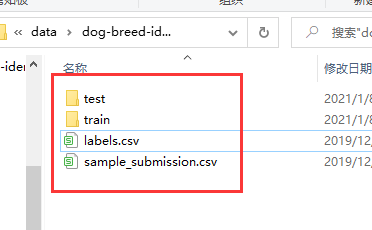
有测试集，训练集，还有存有训练集标签和对应标签的文件名的csv文件
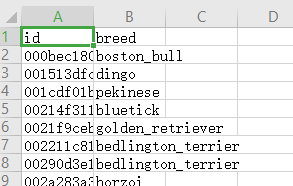

使用的加载方式与最开始的第一种加载方式相同，所以需要将每一个种类的数据照片放到对应种类命名的文件夹中

首先是进行数据集的拆分，导入对应的库

In [62]:
import math
import os
import shutil
from collections import Counter 

然后设置下面会用到的一些变量

In [63]:
data_dir = "F:\\jupyter\\pytorch\\data\\dog-breed-identification"#数据集的根目录
label_file = 'labels.csv'#根目录中csv的文件名加后缀
train_dir = 'train'#根目录中的训练集文件夹的名字
test_dir = 'test'#根目录中的测试集文件夹的名字
input_dir = 'train_valid_test'#用于存放拆分数据集的文件夹的名字，可以不用先创建，会自动创建
batch_size = 4#送往训练的一批次中的数据集的个数
valid_ratio = 0.1#将训练集拆分为90%为训练集10%为验证集

拆分程序的目的是将训练集拆分为训练集和验证集然后分别放到对应的文件夹中，将测试集放到
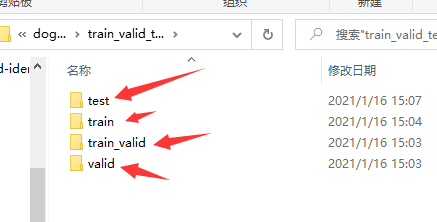
训练集和验证集的文件夹中都是一个个种类的小文件夹，其中存放着对应的数据集图像
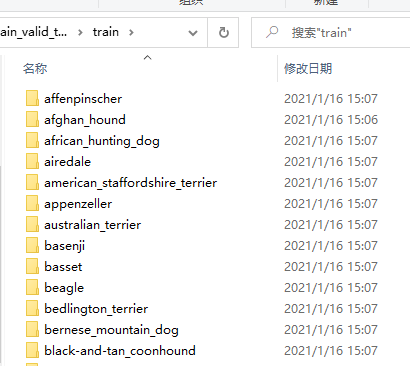
而train_valid则存放着训练集和验证集所有数量的训练数据

而由于test中没有标签所以所有的数据照片都存放在unknown中的
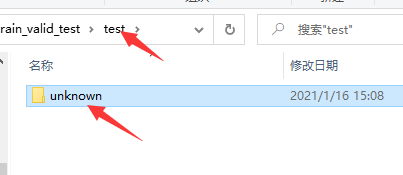

In [64]:
def reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,
                   valid_ratio):
    # 读取训练数据标签，label.csv文件读取标签以及对应的文件名。
    with open(os.path.join(data_dir, label_file), 'r') as f:
        # 跳过文件头行（栏名称）。
        lines = f.readlines()[1:]
        tokens = [l.rstrip().split(',') for l in lines]
        idx_label = dict(((idx, label) for idx, label in tokens))
    labels = set(idx_label.values())

    num_train = len(os.listdir(os.path.join(data_dir, train_dir)))#获取训练集的数量便于数据集的分割
    # 训练集中数量最少一类的狗的数量。
    min_num_train_per_label = (
        Counter(idx_label.values()).most_common()[:-2:-1][0][1])
    # 验证集中每类狗的数量。
    num_valid_per_label = math.floor(min_num_train_per_label * valid_ratio)
    label_count = dict()

    def mkdir_if_not_exist(path):#判断是否有存放拆分后数据集的文件夹，没有就创建一个
        if not os.path.exists(os.path.join(*path)):
            os.makedirs(os.path.join(*path))

    # 整理训练和验证集，将数据集进行拆分复制到预先设置好的存放文件夹中。
    for train_file in os.listdir(os.path.join(data_dir, train_dir)):
        idx = train_file.split('.')[0]
        label = idx_label[idx]
        mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])
        shutil.copy(os.path.join(data_dir, train_dir, train_file),
                    os.path.join(data_dir, input_dir, 'train_valid', label))
        if label not in label_count or label_count[label] < num_valid_per_label:
            mkdir_if_not_exist([data_dir, input_dir, 'valid', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'valid', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            mkdir_if_not_exist([data_dir, input_dir, 'train', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'train', label))

    # 整理测试集，将测试集复制存放在新建路径下的unknown文件夹中。
    mkdir_if_not_exist([data_dir, input_dir, 'test', 'unknown'])
    for test_file in os.listdir(os.path.join(data_dir, test_dir)):
        shutil.copy(os.path.join(data_dir, test_dir, test_file),
                    os.path.join(data_dir, input_dir, 'test', 'unknown'))

In [65]:
#载入数据，进行数据的拆分
reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,valid_ratio)

数据拆分后便可以进行数据的加载了，使用ImageFolder进行数据集的加载，在加载前需要进行数据强化函数的定义
也可以利用前面提及的在未进行transforms处理之前对加载的数据集进行查验，此处就不做赘述。

In [66]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")

In [80]:
# transform_train = transforms.Compose([
#     # 随机对图像裁剪出面积为原图像面积0.08~1倍、且高和宽之比在3/4~4/3的图像，再放缩为高和宽均为224像素的新图像
#     transforms.RandomResizedCrop(28, scale=(0.08, 1.0),  
#                                  ratio=(3.0/4.0, 4.0/3.0)),
#     # 以0.5的概率随机水平翻转
#     transforms.RandomHorizontalFlip(),
#     # 随机更改亮度、对比度和饱和度
#     transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
#     transforms.ToTensor(),
#     # 对各个通道做标准化，(0.485, 0.456, 0.406)和(0.229, 0.224, 0.225)是在ImageNet上计算得的各通道均值与方差
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet上的均值和方差
# ])

# # 在测试集上的图像增强只做确定性的操作
# transform_test = transforms.Compose([
#     transforms.Resize(28),
#     # 将图像中央的高和宽均为224的正方形区域裁剪出来
#     transforms.CenterCrop(28),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])
#也可以使用之前的transforms的函数
data_transform = transforms.Compose([
 transforms.Resize(32), # 缩放图片(Image)，保持长宽比不变，最短边为32像素
 transforms.CenterCrop(32), # 从图片中间切出32*32的图片
 transforms.ToTensor(), # 将图片(Image)转成Tensor，归一化至[0, 1]
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])# 标准化至[-1, 1]，规定均值和标准差

In [81]:
import torchvision
#然后开始加载数据集
new_data_dir="F:\\jupyter\\pytorch\\data\\dog-breed-identification\\train_valid_test"
train_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'train'),transform=transform_train)
valid_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'valid'),transform=transform_train)

In [82]:
#训练数据
img,label=train_ds[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [72]:
#验证集数据
img,label=val_data[0]
for img, label in dataset: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([3, 32, 32]),标签label的值0
图像数据预处理后：
 tensor([[[ 1.8159,  1.8618,  1.8925,  ...,  1.9384,  1.9231,  1.9078],
         [ 1.8006,  1.8465,  1.8771,  ...,  1.9384,  1.9231,  1.9231],
         [ 1.7546,  1.8006,  1.8618,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [-0.8036, -0.7270, -0.7270,  ..., -1.4930, -1.5389, -1.6002],
         [-0.8496, -0.7883, -0.7883,  ..., -0.6351, -1.2172, -1.6155],
         [-0.8343, -0.8496, -0.8343,  ..., -1.1253, -1.3857, -1.6768]],

        [[ 1.3195,  1.3669,  1.4618,  ...,  1.7148,  1.7464,  1.7781],
         [ 1.3037,  1.3511,  1.4144,  ...,  1.7148,  1.7306,  1.7781],
         [ 1.2562,  1.3037,  1.3669,  ...,  1.7148,  1.7464,  1.7939],
         ...,
         [-1.0366, -1.0208, -1.0050,  ..., -1.4952, -1.5268, -1.5901],
         [-1.0524, -1.0524, -1.0524,  ..., -0.8469, -1.3054, -1.5901],
         [-1.0208, -1.0840, -1.0999,  ..., -1.2264, -1.4161, -1.6375]],

        [[ 0.2447,  0.2916,  0.3697,  ...,  0.7135,  0.7291,  

In [83]:
train_loader = torch.utils.data.DataLoader(train_ds,batch_size=4,shuffle=True) 
valid_loader = torch.utils.data.DataLoader(valid_ds,batch_size=4,shuffle=True) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


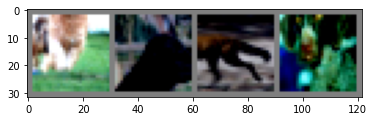

tensor(23) tensor(34) tensor(36) tensor(47)


In [86]:
#训练集数据
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(train_loader)#换此处的值即可切换数据集
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(labels[0],labels[1],labels[2],labels[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


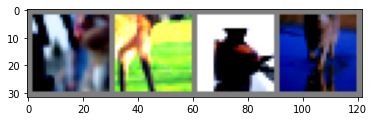

tensor(29) tensor(36) tensor(72) tensor(17)


In [87]:
#验证集数据
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 显示图像
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
# 随机获取部分训练数据
dataiter = iter(valid_loader)#换此处的值即可切换数据集
images, labels = dataiter.next()
# 显示图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(labels[0],labels[1],labels[2],labels[3])

由于有一百多种，使用此处直接使用标签数字表示，可以建立一个标签类，根据标签顺序进行分类
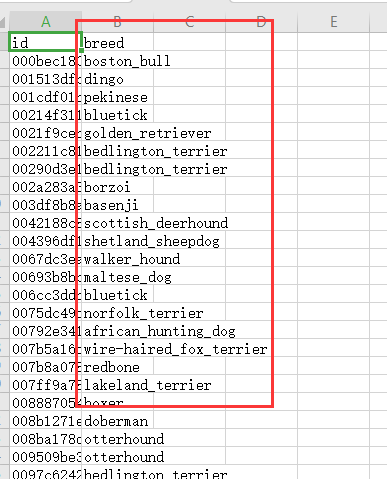

## 4.1完整程序

In [ ]:
#数据集的分割
import math
import os
import shutil
from collections import Counter 
def reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,
                   valid_ratio):
    # 读取训练数据标签。
    with open(os.path.join(data_dir, label_file), 'r') as f:
        # 跳过文件头行（栏名称）。
        lines = f.readlines()[1:]
        tokens = [l.rstrip().split(',') for l in lines]
        idx_label = dict(((idx, label) for idx, label in tokens))
    labels = set(idx_label.values())

    num_train = len(os.listdir(os.path.join(data_dir, train_dir)))
    # 训练集中数量最少一类的狗的数量。
    min_num_train_per_label = (
        Counter(idx_label.values()).most_common()[:-2:-1][0][1])
    # 验证集中每类狗的数量。
    num_valid_per_label = math.floor(min_num_train_per_label * valid_ratio)
    label_count = dict()

    def mkdir_if_not_exist(path):
        if not os.path.exists(os.path.join(*path)):
            os.makedirs(os.path.join(*path))

    # 整理训练和验证集。
    for train_file in os.listdir(os.path.join(data_dir, train_dir)):
        idx = train_file.split('.')[0]
        label = idx_label[idx]
        mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])
        shutil.copy(os.path.join(data_dir, train_dir, train_file),
                    os.path.join(data_dir, input_dir, 'train_valid', label))
        if label not in label_count or label_count[label] < num_valid_per_label:
            mkdir_if_not_exist([data_dir, input_dir, 'valid', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'valid', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            mkdir_if_not_exist([data_dir, input_dir, 'train', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'train', label))

    # 整理测试集。
    mkdir_if_not_exist([data_dir, input_dir, 'test', 'unknown'])
    for test_file in os.listdir(os.path.join(data_dir, test_dir)):
        shutil.copy(os.path.join(data_dir, test_dir, test_file),
                    os.path.join(data_dir, input_dir, 'test', 'unknown'))

reorg_dog_data(data_dir, label_file, train_dir, test_dir, input_dir,
                   valid_ratio)

#加载数据集
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, datasets
from PIL import Image
import pandas as pd
import numpy as np
#过滤警告信息
import warnings
warnings.filterwarnings("ignore")
transform_train = transforms.Compose([
    # 随机对图像裁剪出面积为原图像面积0.08~1倍、且高和宽之比在3/4~4/3的图像，再放缩为高和宽均为224像素的新图像
    transforms.RandomResizedCrop(28, scale=(0.08, 1.0),  
                                 ratio=(3.0/4.0, 4.0/3.0)),
    # 以0.5的概率随机水平翻转
    transforms.RandomHorizontalFlip(),
    # 随机更改亮度、对比度和饱和度
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    # 对各个通道做标准化，(0.485, 0.456, 0.406)和(0.229, 0.224, 0.225)是在ImageNet上计算得的各通道均值与方差
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet上的均值和方差
])

# 在测试集上的图像增强只做确定性的操作
transform_test = transforms.Compose([
    transforms.Resize(28),
    # 将图像中央的高和宽均为224的正方形区域裁剪出来
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
import torchvision
#然后开始加载数据集
new_data_dir="F:\\jupyter\\pytorch\\data\\dog-breed-identification\\train_valid_test"

train_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'train'),transform=transform_train)
valid_ds = datasets.ImageFolder(root=os.path.join(new_data_dir, 'valid'),transform=transform_train)

train_loader = torch.utils.data.DataLoader(train_ds,batch_size=4,shuffle=True) 
valid_loader = torch.utils.data.DataLoader(valid_ds,batch_size=4,shuffle=True) 